# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Quiin Latifah Almatin Lubis
- **Email:** quiinlubis@gmail.com
- **ID Dicoding:** quiinl

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda dari beberapa tahun terkahir?
- Faktor cuaca apa yang paling mempengaruhi jumlah penyewaan sepeda?
- Kapan jam-jam sibuk untuk penyewaan sepeda?
- Bagaimana pengaruh hari libur terhadap jumlah penyewaan sepeda?
- Apakah ada perbedaan dalam pola penyewaan antara pengguna kasual dan pengguna terdaftar?



## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install pipreqs

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pipreqs "/content/drive/MyDrive/Colab Notebooks/" --scan-notebooks

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/drive/MyDrive/Colab Notebooks/requirements.txt


## Data Wrangling

### Gathering Data

In [5]:
day_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dapat dilihat bahwa jumlah pengguna registered(terdaftar) cenderung lebih tinggi daripada pengguna casual
- Di dataset jam (hour.csv), kita dapat memeriksa tren pemakaian sepeda per jam

### Assessing Data

Data Days

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Data Hour

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Di kedua dataset tidak ada missing value ataupun data duplikat tetapi terjadi kesalahan tipe data pada  kolom dteday yang seharusnya menggunakan tipe data **datetime** bukan object
- Tidak ada nilai yang ekstrem atau abnormal dalam deskripsi statistik ini, dan semua variabel tampaknya memiliki distribusi yang wajar dengan nilai mean, min, dan max yang sesuai

### Cleaning Data

Data Day

In [13]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [14]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [15]:
# Mengubah beberapa kolom yang bertipe data numerik menjadi tipe data category agar lebih mudah di baca
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

day_df['yr'] = day_df['yr'].map({
    0: '2011', 1: '2012'
})

day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

day_df['holiday'] = day_df['holiday'].map({
    0: 'Yes', 1: 'No'
})

day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

day_df['workingday'] = day_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})


day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,Yes,Sat,Holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,Yes,Sun,Holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,Yes,Mon,Workingday,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,Yes,Tue,Workingday,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,Yes,Wed,Workingday,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Data Hour

In [16]:
datetime_columns_hour = ["dteday"]

for colum in datetime_columns_hour:
  hour_df[colum] = pd.to_datetime(hour_df[colum])

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [18]:
# Mengubah beberapa kolom yang bertipe data numerik menjadi tipe data category agar lebih mudah di baca
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

hour_df['yr'] = hour_df['yr'].map({
    0: '2011', 1: '2012'
})

hour_df['mnth'] = hour_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})

hour_df['holiday'] = hour_df['holiday'].map({
    0: 'Yes', 1: 'No'
})

hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

hour_df['workingday'] = hour_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})


hour_df['season'] = hour_df.season.astype('category')
hour_df['yr'] = hour_df.yr.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Yes,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,Yes,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,Yes,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,Yes,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,Yes,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada tahap cleaning ini semua tipe data untuk setiap kolomnya sudah sesuai dan data bisa dibaca dengan jelas

## Exploratory Data Analysis (EDA)

In [19]:
day_df.groupby(by='yr').agg({
    'cnt': 'mean'
})

<ipython-input-19-a0582011a880>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='yr').agg({


,cnt
yr,
2011,3405.761644
2012,5599.934426


**Insight:**
- Tren penggunaan sepeda pada 2012 lebih banyak dibandingkan tahun 2011

In [20]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

<ipython-input-20-85b380946de3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").agg({


instant   cnt                                
       nunique   max   min         mean          std
season                                              
Fall       188  8714  1115  5644.303191  1459.800381
Spring     181  7836   431  2604.132597  1399.942119
Summer     184  8362   795  4992.331522  1695.977235
Winter     178  8555    22  4728.162921  1699.615261

**Insight:**
- Musim gugur merupakan periode dengan rata-rata penyewaan sepeda tertinggi dan jumlah maksimum penyewaan sepeda, menunjukkan bahwa orang-orang cenderung lebih banyak menggunakan sepeda selama musim ini.

In [21]:
# Korelasi antara variabel cuaca dan jumlah penyewaan sepeda
correlation = day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

In [22]:
correlation.head()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,1.000000


**Insight:**
- Faktor paling signifikan yang mempengaruhi jumlah penyewaan sepeda adalah temperatur, baik dari data temperatur normal (temp) maupun temperatur aktual (atemp).

In [23]:
weather_counts = day_df.groupby('weathersit')['cnt'].sum()
print(weather_counts)

weathersit
Clear/Partly Cloudy    2257952
Light Snow/Rain          37869
Misty/Cloudy            996858
Name: cnt, dtype: int64


<ipython-input-23-179f9634e9ea>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_counts = day_df.groupby('weathersit')['cnt'].sum()


**Insight:**
- Pada cuaca clear/partly cloudy menghasilkan jumlah penyewaan yang tertinggi

In [24]:
hour_counts = hour_df.groupby(by="hr").agg({
    "cnt": "mean"
})
print(hour_counts)

           cnt
hr            
0    53.898072
1    33.375691
2    22.869930
3    11.727403
4     6.352941
5    19.889819
6    76.044138
7   212.064649
8   359.011004
9   219.309491
10  173.668501
11  208.143054
12  253.315934
13  253.661180
14  240.949246
15  251.233196
16  311.983562
17  461.452055
18  425.510989
19  311.523352
20  226.030220
21  172.314560
22  131.335165
23   87.831044


**Insight:**
- Jam-jam paling sibuk untuk penyewaan sepeda adalah jam 8.00, 17.00, dan 18.00

In [25]:
holiday_counts = day_df.groupby('holiday')['cnt'].sum().reset_index()
print(holiday_counts)

  holiday      cnt
0      No    78435
1     Yes  3214244


<ipython-input-25-8464a5414bcf>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_counts = day_df.groupby('holiday')['cnt'].sum().reset_index()


**Insight:**
- Hari libur secara signifikan meningkatkan jumlah penyewaan sepeda.

In [26]:
day_df.groupby('workingday').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
})

<ipython-input-26-4baab56f25d3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('workingday').agg({


casual   registered   cnt                  
                   mean         mean   max  min         mean
workingday                                                  
Holiday     1371.134199  2959.034632  8714  605  4330.168831
Workingday   606.570000  3978.250000  8362   22  4584.820000

**Insight:**
- Pengguna terdaftar cenderung menggunakan sepeda lebih banyak daripada pengguna kasual, baik pada hari kerja maupun hari libur.

## Visualization & Explanatory Analysis

### Bagaimana tren penggunaan sepeda dari beberapa tahun terkahir?


<ipython-input-27-63b72b28a0a0>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=["mnth","yr"]).agg({


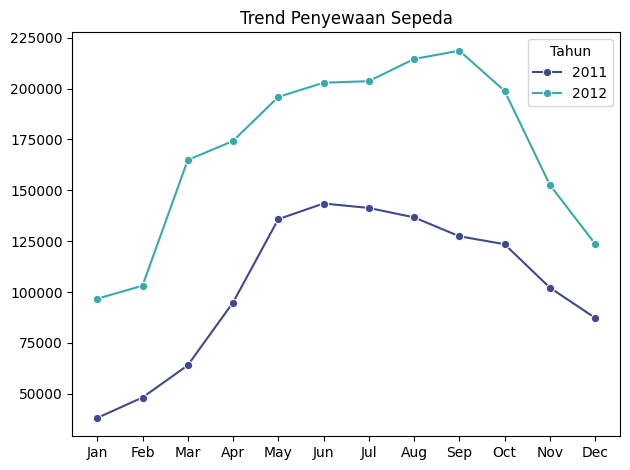

In [27]:
day_df['mnth'] = pd.Categorical(day_df['mnth'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["mnth","yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="mnth",
    y="cnt",
    hue="yr",
    palette="mako",
    marker="o")

plt.title("Trend Penyewaan Sepeda")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

### Faktor cuaca apa yang paling mempengaruhi jumlah penyewaan sepeda?

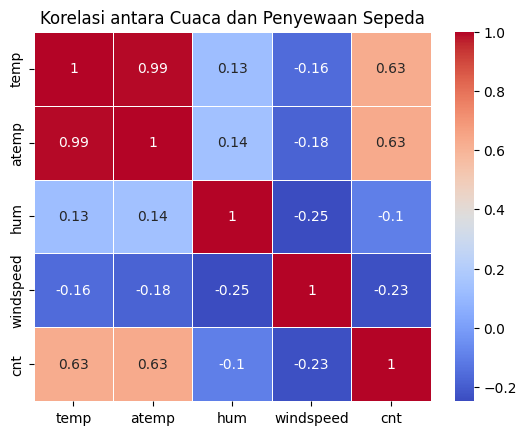

In [28]:
# Korelasi antara variabel cuaca dan jumlah penyewaan sepeda
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi antara Cuaca dan Penyewaan Sepeda')
plt.show()

### Kapan jam-jam sibuk untuk penyewaan sepeda?

<ipython-input-29-abeb369995c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hour_counts, x='hr', y='cnt', palette='viridis')


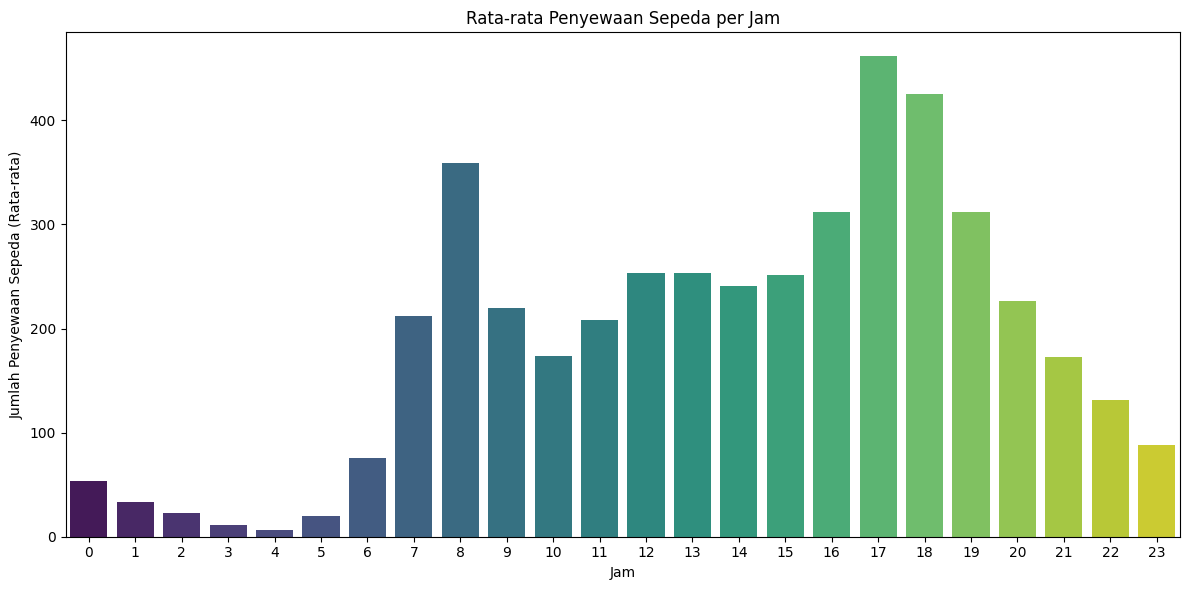

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(data=hour_counts, x='hr', y='cnt', palette='viridis')
plt.title('Rata-rata Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan Sepeda (Rata-rata)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Bagaimana pengaruh hari libur terhadap jumlah penyewaan sepeda?

<ipython-input-30-4d22610e9264>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=holiday_counts, x='holiday', y='cnt', palette='coolwarm')


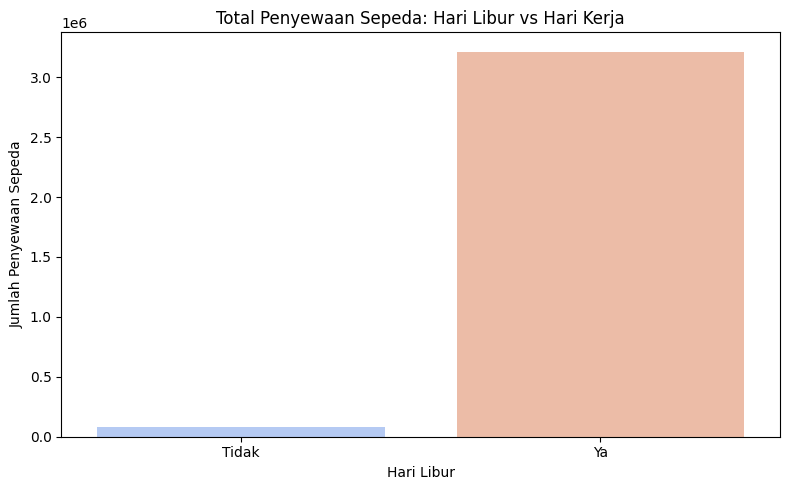

In [30]:
plt.figure(figsize=(8, 5))
sns.barplot(data=holiday_counts, x='holiday', y='cnt', palette='coolwarm')
plt.title('Total Penyewaan Sepeda: Hari Libur vs Hari Kerja')
plt.xlabel('Hari Libur')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks(ticks=[0, 1], labels=['Tidak', 'Ya'])
plt.tight_layout()
plt.show()

### Apakah ada perbedaan dalam pola penyewaan antara pengguna kasual dan pengguna terdaftar?

<ipython-input-31-772e65aa4b8b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_type_counts = day_df.groupby('workingday').agg({


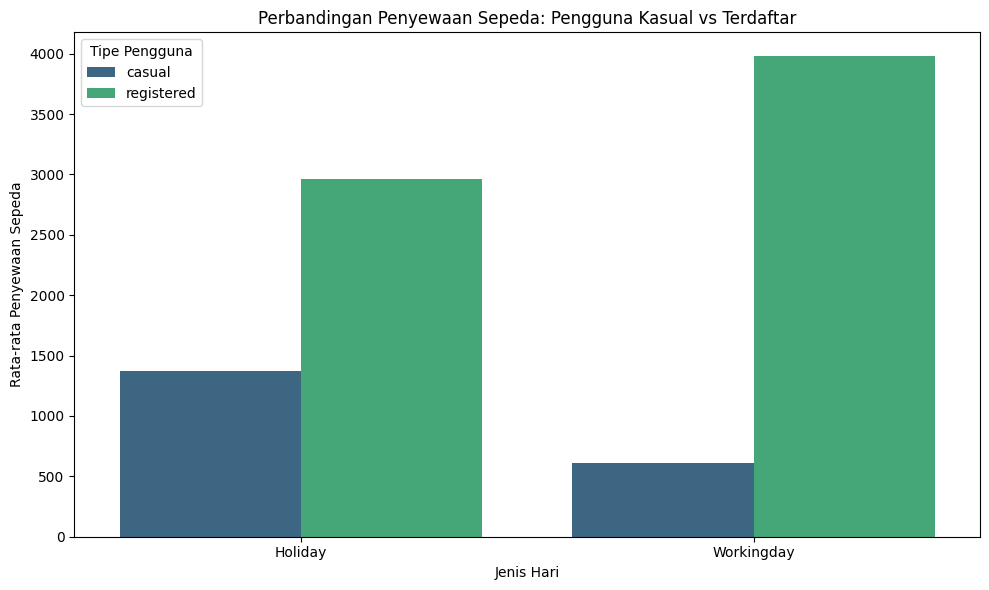

In [31]:
user_type_counts = day_df.groupby('workingday').agg({
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

# Mengubah format data agar lebih mudah digunakan untuk plotting
user_type_counts = user_type_counts.melt(id_vars='workingday', var_name='User Type', value_name='Average Rentals')

# Membuat grafik batang
plt.figure(figsize=(10, 6))
sns.barplot(data=user_type_counts, x='workingday', y='Average Rentals', hue='User Type', palette='viridis')

# Menambahkan judul dan label
plt.title('Perbandingan Penyewaan Sepeda: Pengguna Kasual vs Terdaftar')
plt.xlabel('Jenis Hari')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(ticks=[0, 1], labels=['Holiday', 'Workingday'])
plt.legend(title='Tipe Pengguna')
plt.tight_layout()
plt.show()

In [32]:
day_df.to_csv('cleaned_day.csv', index=False)
hour_df.to_csv('cleaned_hour.csv', index=False)

## Conclusion

1. Bagaimana tren penggunaan sepeda dari beberapa tahun terkahir?
- Tren penggunaan sepeda dari tahun 2011 ke 2012 menunjukkan peningkatan, tahun 2012 memiliki jumlah penyewaan yang lebih tinggi dibandingkan dengan 2011, terutama di bulan-bulan Juli-September.
2. Faktor cuaca apa yang paling mempengaruhi jumlah penyewaan sepeda?
- Berdasarkan korelasi antara variabel cuaca dan jumlah penyewaan sepeda, suhu ("temp" dan "atemp") memiliki korelasi tertinggi dengan jumlah penyewaan sepeda (dengan nilai korelasi 0.63). Kelembaban ("hum") dan kecepatan angin ("windspeed") memiliki pengaruh yang lebih rendah terhadap jumlah penyewaan.
3. Kapan jam-jam sibuk untuk penyewaan sepeda?
- Jam-jam sibuk penyewaan sepeda terjadi pukul 8 pagi dan 5-6 sore. Ini menunjukkan bahwa sepeda banyak digunakan pada jam-jam sibuk, kemungkinan besar untuk perjalanan berangkat dan pulang kerja.
4. Bagaimana pengaruh hari libur terhadap jumlah penyewaan sepeda?
- Hari libur memiliki dampak yang signifikan pada jumlah penyewaan sepeda. Grafik menunjukkan bahwa pada hari libur, jumlah penyewaan sepeda jauh lebih tinggi dibandingkan dengan hari kerja.
5. Apakah ada perbedaan dalam pola penyewaan antara pengguna kasual dan pengguna terdaftar?
- Ya, terdapat perbedaan yang jelas antara pengguna casual dan registered. Pengguna casual cenderung menyewa lebih banyak pada hari libur, sementara pengguna registered lebih sering menyewa pada hari kerja. Hal ini mungkin mencerminkan pola penggunaan di mana pengguna registered menggunakan sepeda sebagai sarana transportasi sehari-hari, sedangkan pengguna casual lebih sering menggunakan sepeda untuk berlibur.